In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import boto3
import json
import sagemaker

In [16]:
import io
s3 = boto3.resource('s3')

data_in_bytes = s3.Object('databucket-covid-19', 'covid.json').get()['Body'].read()
decoded_data = data_in_bytes.decode('utf-8')
stringio_data = io.StringIO(decoded_data)
data = stringio_data.readlines()
json_content = list(map(json.loads, data))

#content_object = s3.Object('databucket-covid-19', 'covid.json')
#file_content = content_object.get()['Body'].read().decode('utf-8')
#json_content = json.loads(file_content)

In [2]:
sagemaker_session = sagemaker.Session()

In [17]:
json_content[0]['start']
dates = []
cases = []
deaths = []
for x in range(len(json_content)):
    dates.append(json_content[x]['start'])
    cases.append(json_content[x]['target'][0])
    deaths.append(json_content[x]['target'][1])


Text(0.5, 1.0, 'Cases Over Time')

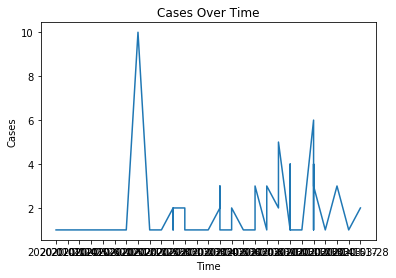

In [18]:
plt.plot(dates,cases,label='Cases Over Time')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.title('Cases Over Time')

Text(0.5, 1.0, 'Deaths Over Time')

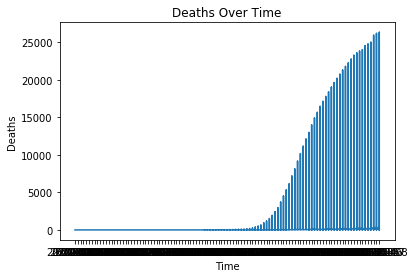

In [113]:
plt.plot(dates,deaths,label='Deaths Over Time')
plt.xlabel('Time')
plt.ylabel('Deaths')
plt.title('Deaths Over Time')

In [3]:
my_session = boto3.session.Session()
my_region = my_session.region_name
image_name = sagemaker.amazon.amazon_estimator.get_image_uri(my_region, "forecasting-deepar", "latest")
role = sagemaker.get_execution_role()

In [4]:
estimator = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_name=image_name,
    role=role,
    train_instance_count=1,
    train_instance_type='ml.c4.2xlarge',
    base_job_name='covid-19-deepar',
    output_path='s3://databucket-covid-19/'
)

In [5]:
prediction_length = 20
context_length = 20
hyperparameters = {
    "time_freq": 'D',
    "epochs": "400",
    "early_stopping_patience": "40",
    "mini_batch_size": "64",
    "learning_rate": "5E-4",
    "context_length": str(context_length),
    "prediction_length": str(prediction_length)
}

In [6]:
estimator.set_hyperparameters(**hyperparameters)

In [8]:
data_channels = {
    "train": "s3://databucket-covid-19/"
}

estimator.fit(inputs=data_channels, wait=True)

2020-05-10 18:31:01 Starting - Starting the training job...
2020-05-10 18:31:04 Starting - Launching requested ML instances......
2020-05-10 18:32:09 Starting - Preparing the instances for training...
2020-05-10 18:33:00 Downloading - Downloading input data...
2020-05-10 18:33:29 Training - Downloading the training image...
2020-05-10 18:33:44 Training - Training image download completed. Training in progress.Arguments: train
[05/10/2020 18:33:46 INFO 140026428319552] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'au

[05/10/2020 18:33:56 INFO 140026428319552] Epoch[12] Batch[5] avg_epoch_loss=6.245221
[05/10/2020 18:33:56 INFO 140026428319552] #quality_metric: host=algo-1, epoch=12, batch=5 train loss <loss>=6.24522074064
[05/10/2020 18:33:56 INFO 140026428319552] Epoch[12] Batch [5]#011Speed: 1496.94 samples/sec#011loss=6.245221
[05/10/2020 18:33:56 INFO 140026428319552] Epoch[12] Batch[10] avg_epoch_loss=6.401708
[05/10/2020 18:33:56 INFO 140026428319552] #quality_metric: host=algo-1, epoch=12, batch=10 train loss <loss>=6.58949232101
[05/10/2020 18:33:56 INFO 140026428319552] Epoch[12] Batch [10]#011Speed: 1385.19 samples/sec#011loss=6.589492
[05/10/2020 18:33:56 INFO 140026428319552] processed a total of 655 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 662.1689796447754, "sum": 662.1689796447754, "min": 662.1689796447754}}, "EndTime": 1589135636.527326, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589135635.865104}

[05

[05/10/2020 18:34:11 INFO 140026428319552] Epoch[34] Batch[10] avg_epoch_loss=5.436159
[05/10/2020 18:34:11 INFO 140026428319552] #quality_metric: host=algo-1, epoch=34, batch=10 train loss <loss>=5.45986642838
[05/10/2020 18:34:11 INFO 140026428319552] Epoch[34] Batch [10]#011Speed: 1307.95 samples/sec#011loss=5.459866
[05/10/2020 18:34:11 INFO 140026428319552] processed a total of 686 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 667.7470207214355, "sum": 667.7470207214355, "min": 667.7470207214355}}, "EndTime": 1589135651.384792, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589135650.716552}

[05/10/2020 18:34:11 INFO 140026428319552] #throughput_metric: host=algo-1, train throughput=1027.15363292 records/second
[05/10/2020 18:34:11 INFO 140026428319552] #progress_metric: host=algo-1, completed 8 % of epochs
[05/10/2020 18:34:11 INFO 140026428319552] #quality_metric: host=algo-1, epoch=34, train loss <loss>=5

[05/10/2020 18:34:21 INFO 140026428319552] processed a total of 638 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 646.8491554260254, "sum": 646.8491554260254, "min": 646.8491554260254}}, "EndTime": 1589135661.306284, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589135660.659}

[05/10/2020 18:34:21 INFO 140026428319552] #throughput_metric: host=algo-1, train throughput=986.141496153 records/second
[05/10/2020 18:34:21 INFO 140026428319552] #progress_metric: host=algo-1, completed 12 % of epochs
[05/10/2020 18:34:21 INFO 140026428319552] #quality_metric: host=algo-1, epoch=49, train loss <loss>=5.10119996071
[05/10/2020 18:34:21 INFO 140026428319552] loss did not improve
[05/10/2020 18:34:21 INFO 140026428319552] Epoch[50] Batch[0] avg_epoch_loss=5.517509
[05/10/2020 18:34:21 INFO 140026428319552] #quality_metric: host=algo-1, epoch=50, batch=0 train loss <loss>=5.51750850677
[05/10/2020 18:34:21 INFO 140026428319

[05/10/2020 18:34:31 INFO 140026428319552] Epoch[64] Batch[5] avg_epoch_loss=4.943843
[05/10/2020 18:34:31 INFO 140026428319552] #quality_metric: host=algo-1, epoch=64, batch=5 train loss <loss>=4.9438431263
[05/10/2020 18:34:31 INFO 140026428319552] Epoch[64] Batch [5]#011Speed: 1452.34 samples/sec#011loss=4.943843
[05/10/2020 18:34:31 INFO 140026428319552] Epoch[64] Batch[10] avg_epoch_loss=5.037020
[05/10/2020 18:34:31 INFO 140026428319552] #quality_metric: host=algo-1, epoch=64, batch=10 train loss <loss>=5.14883136749
[05/10/2020 18:34:31 INFO 140026428319552] Epoch[64] Batch [10]#011Speed: 1419.40 samples/sec#011loss=5.148831
[05/10/2020 18:34:31 INFO 140026428319552] processed a total of 675 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 698.4360218048096, "sum": 698.4360218048096, "min": 698.4360218048096}}, "EndTime": 1589135671.423592, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589135670.724754}

[05/

[05/10/2020 18:34:41 INFO 140026428319552] Epoch[79] Batch[5] avg_epoch_loss=4.906216
[05/10/2020 18:34:41 INFO 140026428319552] #quality_metric: host=algo-1, epoch=79, batch=5 train loss <loss>=4.90621606509
[05/10/2020 18:34:41 INFO 140026428319552] Epoch[79] Batch [5]#011Speed: 1496.91 samples/sec#011loss=4.906216
[05/10/2020 18:34:41 INFO 140026428319552] processed a total of 622 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 646.8830108642578, "sum": 646.8830108642578, "min": 646.8830108642578}}, "EndTime": 1589135681.534289, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589135680.886943}

[05/10/2020 18:34:41 INFO 140026428319552] #throughput_metric: host=algo-1, train throughput=961.401817588 records/second
[05/10/2020 18:34:41 INFO 140026428319552] #progress_metric: host=algo-1, completed 20 % of epochs
[05/10/2020 18:34:41 INFO 140026428319552] #quality_metric: host=algo-1, epoch=79, train loss <loss>=4.9

[05/10/2020 18:34:51 INFO 140026428319552] Epoch[94] Batch[5] avg_epoch_loss=5.003830
[05/10/2020 18:34:51 INFO 140026428319552] #quality_metric: host=algo-1, epoch=94, batch=5 train loss <loss>=5.00383035342
[05/10/2020 18:34:51 INFO 140026428319552] Epoch[94] Batch [5]#011Speed: 1482.37 samples/sec#011loss=5.003830
[05/10/2020 18:34:51 INFO 140026428319552] Epoch[94] Batch[10] avg_epoch_loss=4.780247
[05/10/2020 18:34:51 INFO 140026428319552] #quality_metric: host=algo-1, epoch=94, batch=10 train loss <loss>=4.51194758415
[05/10/2020 18:34:51 INFO 140026428319552] Epoch[94] Batch [10]#011Speed: 1380.95 samples/sec#011loss=4.511948
[05/10/2020 18:34:51 INFO 140026428319552] processed a total of 649 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 678.7528991699219, "sum": 678.7528991699219, "min": 678.7528991699219}}, "EndTime": 1589135691.437631, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589135690.758447}

[05


2020-05-10 18:35:12 Uploading - Uploading generated training model
2020-05-10 18:35:12 Completed - Training job completed
Training seconds: 132
Billable seconds: 132


In [9]:
job_name = estimator.latest_training_job.name

endpoint_name = sagemaker_session.endpoint_from_job(
    job_name=job_name,
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    deployment_image=image_name,
    role=role
)

---------------!

In [20]:
predictor = sagemaker.predictor.RealTimePredictor(endpoint_name,sagemaker_session)

In [27]:
request = json.dumps({
    "instances": json_content,
    "configuration": {
        "num_samples": 50,
        "output_types": ["mean"]
    }
})

In [28]:
result = predictor.predict(request)

In [ ]:
#sagemaker_session.delete_endpoint(endpoint_name)